# Build and train a neural network to classify clothing images

## Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the Fashion-MNIST dataset, a drop-in replacement for the MNIST dataset. **MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy.** Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network.

### **First** load the dataset through torchvision.
Import neccessary modules ,download data and create trainloader

In [1]:
import torch

from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

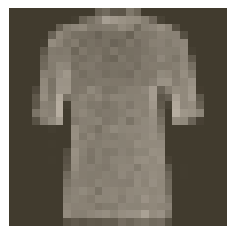

In [2]:
# One of the images
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

## Building the network (Part2)
Here you should define your network. As with MNIST, each image is **28x28** which is a total of **784 pixels**, and there are **10 classes**. You should include at least **one hidden layer**. We suggest you **use ReLU activations** for the layers and to **return the logits or log-softmax from the forward pass**. It's up to you how many layers you add and the size of those layers.

In [3]:
# TODO: Define your network architecture here
from torch import nn
from torch import optim
import torch.nn.functional as F

#Build a feed-forward network , that returns log-softmax
# feature or total image is 784
# 3 hidden size h1 256 , 128 ,64
# o/p 10 

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Defining layer 
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256,128)
        self.fc3 = nn.Linear(128,64)   
        
        # Output layer, 10 units - one for each digit
        self.fc4 = nn.Linear(64, 10)

        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.fc1(x)
        x = F.relu(x)   # or  combine  x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.fc4(x)
        x = F.softmax(x, dim=1)
        
        return x
    
model = Network()
model


Network(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)

In [4]:
# Define the loss
criterion = nn.CrossEntropyLoss()

# Get our data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our logits
logits = model(images)
# Calculate the loss with the logits and the labels
loss = criterion(logits, labels)

print(loss)

tensor(2.3038, grad_fn=<NllLossBackward>)


## Train the network
Now you should create your network and train it. 
1. Define the criterion ( something like nn.CrossEntropyLoss) 
2. Optimizer (typically optim.SGD or optim.Adam).
3. Then write the training code.
    * Make a forward pass through the network to get the logits
    * Use the logits to calculate the loss
    * Perform a backward pass through the network with loss.backward() to calculate the gradients
    * Take a step with the optimizer to update the weights
By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.

In [6]:
# TODO: Create the network, define the criterion and optimizer

# Define the loss 
criterion = nn.CrossEntropyLoss()

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.003)
# or use SGD Or ADAM (Adamis faster)
#optimizer = optim.ADAM(model.parameters(), lr=0.003)



In [9]:
# TODO: Train the network here

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        
        # Clear the gradients, do this because gradients are accumulated
        optimizer.zero_grad()

        # Forward pass, then backward pass, then update weights
        output = model(images)
        loss = criterion(output, labels)
        
        # backward pass through the network to calculate the gradients
        loss.backward()
        
        # Take an update step and few the new weights
        optimizer.step()
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 2.2669125769946623
Training loss: 2.2389730095609166
Training loss: 2.200960345105576
Training loss: 2.136093173199879
Training loss: 2.0838982767896104


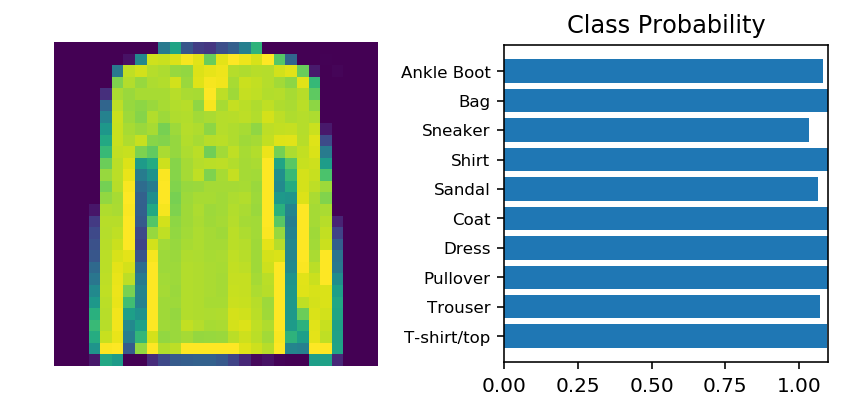

In [14]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img

# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)
    
ps = torch.exp(logps)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')